Абсолютная частота (Month):
2     1
3     1
4     2
5     1
7     1
8     2
9     1
10    1
12    1
Name: count, dtype: int64
Абсолютная частота (Number):
0    2
1    1
2    2
3    2
6    1
7    1
8    2
Name: count, dtype: int64

Относительная частота (Month):
2     0.090909
3     0.090909
4     0.181818
5     0.090909
7     0.090909
8     0.181818
9     0.090909
10    0.090909
12    0.090909
Name: count, dtype: float64
Относительная частота (Number):
0    0.181818
1    0.090909
2    0.181818
3    0.181818
6    0.090909
7    0.090909
8    0.181818
Name: count, dtype: float64


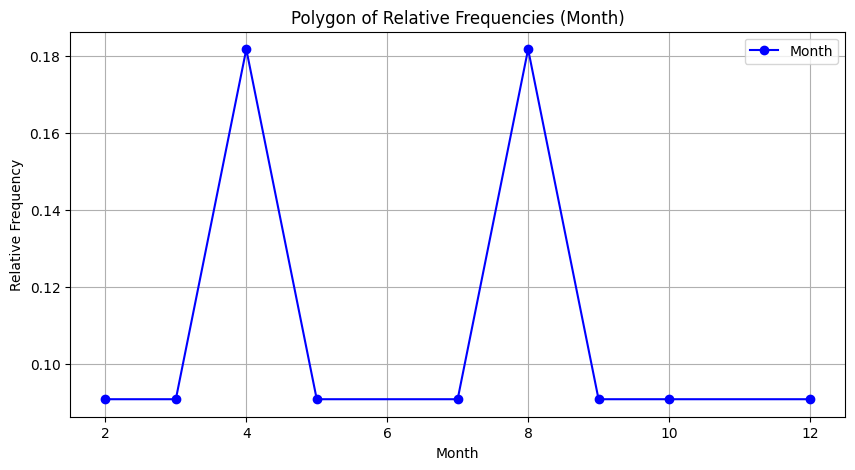

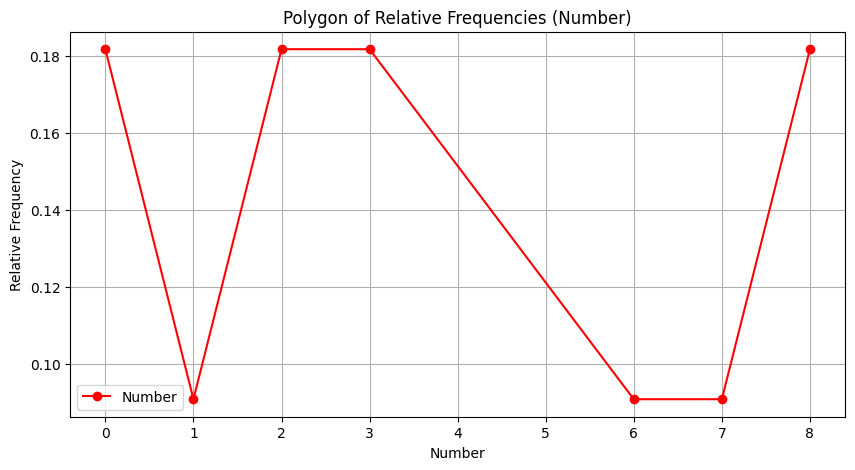

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

height = [1.67, 1.75, 1.88, 1.73, 1.7, 1.6, 1.8, 1.8, 1.76, 1.88, 1.84]
month = [3, 12, 8, 7, 9, 4, 4, 8, 5, 10, 2]
random_num = [8, 1, 6, 3, 0, 8, 2, 3, 7, 0, 2]

# Подсчет абсолютной частоты
df_month = pd.Series(month).value_counts().sort_index()
df_random_num = pd.Series(random_num).value_counts().sort_index()

# Относительная частота
relative_freq_month = df_month / len(month)
relative_freq_number = df_random_num / len(random_num)

print("Абсолютная частота (Month):")
print(df_month)
print("Абсолютная частота (Number):")
print(df_random_num)

print("\nОтносительная частота (Month):")
print(relative_freq_month)
print("Относительная частота (Number):")
print(relative_freq_number)

# Построение полигона относительных частот для 'month'
plt.figure(figsize=(10, 5))
plt.plot(relative_freq_month.index, relative_freq_month.values, marker='o', linestyle='-', color='blue', label='Month')
plt.title('Polygon of Relative Frequencies (Month)')
plt.xlabel('Month')
plt.ylabel('Relative Frequency')
plt.grid(True)
plt.legend()
plt.show()

# Построение полигона относительных частот для 'number'
plt.figure(figsize=(10, 5))
plt.plot(relative_freq_number.index, relative_freq_number.values, marker='o', linestyle='-', color='red', label='Number')
plt.title('Polygon of Relative Frequencies (Number)')
plt.xlabel('Number')
plt.ylabel('Relative Frequency')
plt.grid(True)
plt.legend()
plt.show()


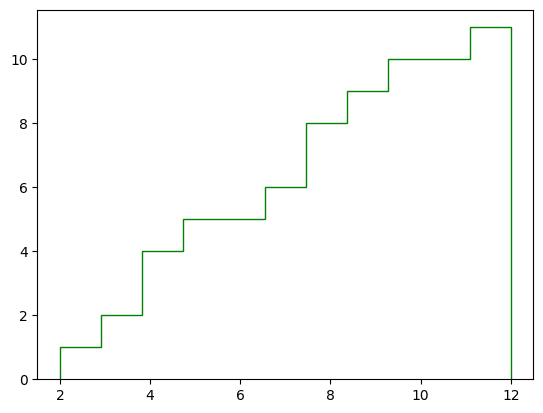

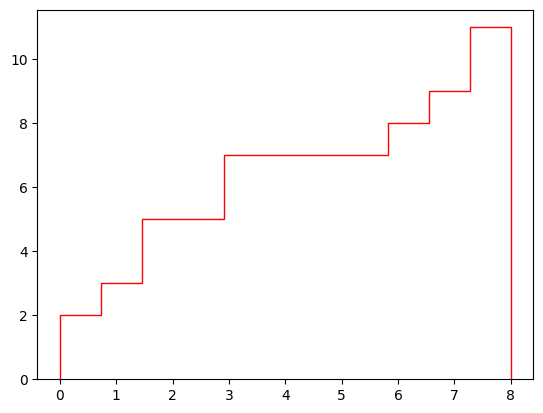

In [3]:
plt.hist(month, histtype='step', color = 'green', cumulative=True, bins=len(month))
plt.show()

plt.hist(random_num, histtype='step', color = 'red', cumulative=True, bins=len(random_num))
plt.show()

In [5]:
from statistics import *

print(f"Среднее значение для 'month': {mean(month)}")
print(f"Среднее значение для 'random_num': {mean(random_num)}\n")

print(f"Дисперсия для 'month': {variance(month)}")
print(f"Дисперсия для 'random_num': {variance(random_num)}\n")

print(f"Стандартное отклонение для 'month': {stdev(month)}")
print(f"Стандартное отклонение для 'random_num': {stdev(random_num)}\n")

print(f"Медиана для 'month': {median(month)}")
print(f"Медиана для 'random_num': {median(random_num)}\n")

print(f"Отношение стандартного отклонения к среднему для 'month': {stdev(month) / mean(month)}")
print(f"Отношение стандартного отклонения к среднему для 'random_num': {stdev(random_num) / mean(random_num)}")


Среднее значение для 'month': 6.545454545454546
Среднее значение для 'random_num': 3.6363636363636362

Дисперсия для 'month': 10.072727272727272
Дисперсия для 'random_num': 9.454545454545455

Стандартное отклонение для 'month': 3.1737560197228887
Стандартное отклонение для 'random_num': 3.0748244591432297

Медиана для 'month': 7
Медиана для 'random_num': 3

Отношение стандартного отклонения к среднему для 'month': 0.48487939190210794
Отношение стандартного отклонения к среднему для 'random_num': 0.8455767262643882


Вариационный ряд (интервалы и частоты):
Интервал: [1.60, 1.67), Частота: 1
Интервал: [1.67, 1.74), Частота: 3
Интервал: [1.74, 1.81), Частота: 4
Интервал: [1.81, 1.88), Частота: 3


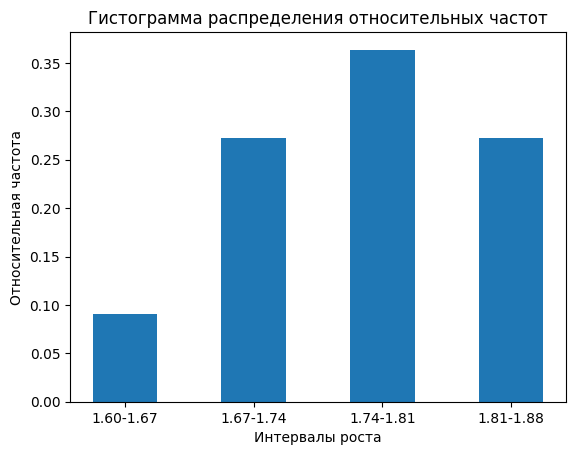

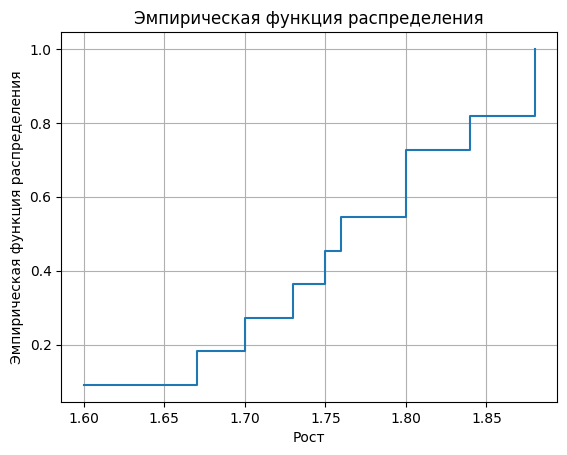

выборочное среднее 1.7645454545454546
дисперсия 0.007647272727272723
стандартное отклонение 0.0874486862524116
медиана 1.76
коэффициент вариации 0.04955876088493187


In [4]:
import numpy as np
from math import *

height = [1.67, 1.75, 1.88, 1.73, 1.7, 1.6, 1.8, 1.8, 1.76, 1.88, 1.84]

n = len(height)
m = int(1 + 3.322 * np.log10(n))

R = max(height) - min(height)
h = R / m
bins = [min(height) + i * h for i in range(m + 1)]

hist, edges = np.histogram(height, bins=bins)
variational_row = list(zip(bins[:-1], bins[1:], hist))
print("Вариационный ряд (интервалы и частоты):")
for interval in variational_row:
    print(f"Интервал: [{interval[0]:.2f}, {interval[1]:.2f}), Частота: {interval[2]}")

relative_frequencies = hist / n

plt.bar([f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(m)], relative_frequencies, width=0.5)
plt.xlabel('Интервалы роста')
plt.ylabel('Относительная частота')
plt.title('Гистограмма распределения относительных частот')
plt.show()

sorted_heights = np.sort(height)
empirical_cdf = np.arange(1, n + 1) / n
plt.step(sorted_heights, empirical_cdf, where='post')
plt.xlabel('Рост')
plt.ylabel('Эмпирическая функция распределения')
plt.title('Эмпирическая функция распределения')
plt.grid()
plt.show()

print("выборочное среднее", mean(height))
print("дисперсия", variance(height))
print("стандартное отклонение", stdev(height))
print("медиана", median(height))
print("коэффициент вариации", stdev(height) / mean(height))